# Pro Kabbadi League Predictions :

### 1.Reading and Understanding the Data : 

In [821]:
#importing the libraries 
import os
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns 

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

import statsmodels.api as sm 
from statsmodels.stats.outliers_influence import variance_inflation_factor

import warnings 
warnings.filterwarnings('ignore')

# TOURNAMENT PREDICTION : 

In [822]:
#read the data
match_schedule=pd.read_csv("SCHEDULE.csv")
match_schedule

,DATE/DAY,EXTRACT_TEAM1,EXTRACT_TEAM2,RESULT,LOCATION,MATCH_TYPE,SEASON
0,"Saturday, 26 July",https://www.prokabaddi.com/teams/u-mumba-profi...,https://www.prokabaddi.com/teams/jaipur-pink-p...,U Mumba beat Jaipur Pink Panthers (45 - 31),"DOME@NSCI SVP Stadium, Mumbai",LEAGUE,1
1,"Saturday, 26 July",https://www.prokabaddi.com/teams/dabang-delhi-...,https://www.prokabaddi.com/teams/bengaluru-bul...,Bengaluru Bulls beat Dabang Delhi (47 - 28),"DOME@NSCI SVP Stadium, Mumbai",LEAGUE,1
2,"Sunday, 27 July",https://www.prokabaddi.com/teams/bengaluru-bul...,https://www.prokabaddi.com/teams/puneri-paltan...,Bengaluru Bulls beat Puneri Paltan (40 - 37),"DOME@NSCI SVP Stadium, Mumbai",LEAGUE,1
3,"Sunday, 27 July",https://www.prokabaddi.com/teams/u-mumba-profi...,https://www.prokabaddi.com/teams/bengal-warrio...,U Mumba beat Bengal Warriors (36 - 25),"DOME@NSCI SVP Stadium, Mumbai",LEAGUE,1
4,"Monday, 28 July",https://www.prokabaddi.com/teams/puneri-paltan...,https://www.prokabaddi.com/teams/dabang-delhi-...,Dabang Delhi beat Puneri Paltan (35 - 31),"DOME@NSCI SVP Stadium, Mumbai",LEAGUE,1
5,"Monday, 28 July",https://www.prokabaddi.com/teams/u-mumba-profi...,https://www.prokabaddi.com/teams/telugu-titans...,Match Drawn (35 - 35),"DOME@NSCI SVP Stadium, Mumbai",LEAGUE,1
6,"Tuesday, 29 July",https://www.prokabaddi.com/teams/u-mumba-profi...,https://www.prokabaddi.com/teams/patna-pirates...,U Mumba beat Patna Pirates (36 - 33),"DOME@NSCI SVP Stadium, Mumbai",LEAGUE,1
7,"Wednesday, 30 July",https://www.prokabaddi.com/teams/bengal-warrio...,https://www.prokabaddi.com/teams/bengaluru-bul...,Bengaluru Bulls beat Bengal Warriors (46 - 30),"Netaji Subhash Chandra Bose Indoor Stadium, Ko...",LEAGUE,1
8,"Thursday, 31 July",https://www.prokabaddi.com/teams/jaipur-pink-p...,https://www.prokabaddi.com/teams/telugu-titans...,Jaipur Pink Panthers beat Telugu Titans (46 - 32),"Netaji Subhash Chandra Bose Indoor Stadium, Ko...",LEAGUE,1
9,"Thursday, 31 July",https://www.prokabaddi.com/teams/bengal-warrio...,https://www.prokabaddi.com/teams/dabang-delhi-...,Bengal Warriors beat Dabang Delhi (42 - 40),"Netaji Subhash Chandra Bose Indoor Stadium, Ko...",LEAGUE,1


In [823]:
match_schedule.shape

(652, 7)

In [824]:

new = match_schedule["EXTRACT_TEAM1"].str.split("s/", n = 1, expand = True)
new2=new[1].str.split("-p",n=1,expand=True)
new3 = match_schedule["EXTRACT_TEAM2"].str.split("s/", n = 1, expand = True)
new4=new3[1].str.split("-p",n=1,expand=True)
match_schedule.insert(1, "Team1", new2[0]) 
match_schedule.insert(2, "Team2", new4[0])
match_schedule=match_schedule.drop(['EXTRACT_TEAM1', 'EXTRACT_TEAM2'], axis = 1)
match_schedule['Team1'].fillna('x',inplace=True)
match_schedule['Team2'].fillna('x',inplace=True)
vals_to_replace = {'u-mumba':'U Mumba', 'jaipur':'Jaipur Pink Panthers ', 'puneri':'Puneri Paltan','patna':'Patna Pirates','bengaluru-bulls':'Bengaluru Bulls','dabang-delhi-kc':'Dabang Delhi','telugu-titans':'Telugu Titans','bengal-warriors':'Bengal Warriors','haryana-steelers':'Haryana Steelers','up-yoddha':'U.P. Yoddha','gujarat-fortunegiants':'Gujarat Fortunegiants','tamil-thalaivas':'Tamil Thalaivas'}
match_schedule['Team1'] = match_schedule['Team1'].map(vals_to_replace)
match_schedule['Team2'] = match_schedule['Team2'].map(vals_to_replace)
match_schedule

,DATE/DAY,Team1,Team2,RESULT,LOCATION,MATCH_TYPE,SEASON
0,"Saturday, 26 July",U Mumba,Jaipur Pink Panthers,U Mumba beat Jaipur Pink Panthers (45 - 31),"DOME@NSCI SVP Stadium, Mumbai",LEAGUE,1
1,"Saturday, 26 July",Dabang Delhi,Bengaluru Bulls,Bengaluru Bulls beat Dabang Delhi (47 - 28),"DOME@NSCI SVP Stadium, Mumbai",LEAGUE,1
2,"Sunday, 27 July",Bengaluru Bulls,Puneri Paltan,Bengaluru Bulls beat Puneri Paltan (40 - 37),"DOME@NSCI SVP Stadium, Mumbai",LEAGUE,1
3,"Sunday, 27 July",U Mumba,Bengal Warriors,U Mumba beat Bengal Warriors (36 - 25),"DOME@NSCI SVP Stadium, Mumbai",LEAGUE,1
4,"Monday, 28 July",Puneri Paltan,Dabang Delhi,Dabang Delhi beat Puneri Paltan (35 - 31),"DOME@NSCI SVP Stadium, Mumbai",LEAGUE,1
5,"Monday, 28 July",U Mumba,Telugu Titans,Match Drawn (35 - 35),"DOME@NSCI SVP Stadium, Mumbai",LEAGUE,1
6,"Tuesday, 29 July",U Mumba,Patna Pirates,U Mumba beat Patna Pirates (36 - 33),"DOME@NSCI SVP Stadium, Mumbai",LEAGUE,1
7,"Wednesday, 30 July",Bengal Warriors,Bengaluru Bulls,Bengaluru Bulls beat Bengal Warriors (46 - 30),"Netaji Subhash Chandra Bose Indoor Stadium, Ko...",LEAGUE,1
8,"Thursday, 31 July",Jaipur Pink Panthers,Telugu Titans,Jaipur Pink Panthers beat Telugu Titans (46 - 32),"Netaji Subhash Chandra Bose Indoor Stadium, Ko...",LEAGUE,1
9,"Thursday, 31 July",Bengal Warriors,Dabang Delhi,Bengal Warriors beat Dabang Delhi (42 - 40),"Netaji Subhash Chandra Bose Indoor Stadium, Ko...",LEAGUE,1


In [825]:
sep = match_schedule["RESULT"].str.split("(", n = 1, expand = True)
pts_diff=sep[1].str.split(")",expand=True)
win=sep[0].str.split(" beat ",expand=True)

In [826]:
match_schedule.insert(3, "Winner", win[0]) 
win_pts=pts_diff[0].str.split("-",n=1,expand=True)
match_schedule.insert(4, "Winner_Points", win_pts[0])
match_schedule.insert(5, "Loser_Points", win_pts[1])
match_schedule.insert(6, "Points_Difference", pts_diff[0])
match_schedule=match_schedule.drop('RESULT', axis = 1)
#match_schedule.Winner = match_schedule.Winner.apply(lambda x:'Dabang Delhi K.C.' if 'Dabang Delhi' in x else x)
match_schedule.head()

,DATE/DAY,Team1,Team2,Winner,Winner_Points,Loser_Points,Points_Difference,LOCATION,MATCH_TYPE,SEASON
0,"Saturday, 26 July",U Mumba,Jaipur Pink Panthers,U Mumba,45,31,45 - 31,"DOME@NSCI SVP Stadium, Mumbai",LEAGUE,1
1,"Saturday, 26 July",Dabang Delhi,Bengaluru Bulls,Bengaluru Bulls,47,28,47 - 28,"DOME@NSCI SVP Stadium, Mumbai",LEAGUE,1
2,"Sunday, 27 July",Bengaluru Bulls,Puneri Paltan,Bengaluru Bulls,40,37,40 - 37,"DOME@NSCI SVP Stadium, Mumbai",LEAGUE,1
3,"Sunday, 27 July",U Mumba,Bengal Warriors,U Mumba,36,25,36 - 25,"DOME@NSCI SVP Stadium, Mumbai",LEAGUE,1
4,"Monday, 28 July",Puneri Paltan,Dabang Delhi,Dabang Delhi,35,31,35 - 31,"DOME@NSCI SVP Stadium, Mumbai",LEAGUE,1


In [827]:
LOCS = match_schedule["LOCATION"].str.split(",", n = 1, expand = True)
Locs=LOCS[1].str.split("\n",n=1,expand=True)
match_schedule=match_schedule.drop('LOCATION', axis = 1)
match_schedule.insert(7, "Location", Locs[0])
match_schedule.head()

,DATE/DAY,Team1,Team2,Winner,Winner_Points,Loser_Points,Points_Difference,Location,MATCH_TYPE,SEASON
0,"Saturday, 26 July",U Mumba,Jaipur Pink Panthers,U Mumba,45,31,45 - 31,Mumbai,LEAGUE,1
1,"Saturday, 26 July",Dabang Delhi,Bengaluru Bulls,Bengaluru Bulls,47,28,47 - 28,Mumbai,LEAGUE,1
2,"Sunday, 27 July",Bengaluru Bulls,Puneri Paltan,Bengaluru Bulls,40,37,40 - 37,Mumbai,LEAGUE,1
3,"Sunday, 27 July",U Mumba,Bengal Warriors,U Mumba,36,25,36 - 25,Mumbai,LEAGUE,1
4,"Monday, 28 July",Puneri Paltan,Dabang Delhi,Dabang Delhi,35,31,35 - 31,Mumbai,LEAGUE,1


In [828]:
match_schedule.dtypes

DATE/DAY             object
Team1                object
Team2                object
Winner               object
Winner_Points        object
Loser_Points         object
Points_Difference    object
Location             object
MATCH_TYPE           object
SEASON                int64
dtype: object

In [829]:
match_schedule[['Winner_Points', 'Loser_Points']] = match_schedule[['Winner_Points', 'Loser_Points']].apply(pd.to_numeric) 
match_schedule.dtypes

DATE/DAY              object
Team1                 object
Team2                 object
Winner                object
Winner_Points        float64
Loser_Points         float64
Points_Difference     object
Location              object
MATCH_TYPE            object
SEASON                 int64
dtype: object

In [830]:
model_data=match_schedule[['Team1','Team2','Location','SEASON','MATCH_TYPE','Winner']]
model_data1=model_data
model_data1.head()

,Team1,Team2,Location,SEASON,MATCH_TYPE,Winner
0,U Mumba,Jaipur Pink Panthers,Mumbai,1,LEAGUE,U Mumba
1,Dabang Delhi,Bengaluru Bulls,Mumbai,1,LEAGUE,Bengaluru Bulls
2,Bengaluru Bulls,Puneri Paltan,Mumbai,1,LEAGUE,Bengaluru Bulls
3,U Mumba,Bengal Warriors,Mumbai,1,LEAGUE,U Mumba
4,Puneri Paltan,Dabang Delhi,Mumbai,1,LEAGUE,Dabang Delhi


In [831]:
encoding_cols=['Location']
le = LabelEncoder()
model_data1[encoding_cols] = model_data1[encoding_cols].apply(lambda col: le.fit_transform(col))
vals_to_replace={'LEAGUE':1,'ELIMINATOR':2,'QUALIFIER':3,'FINAL':4}
model_data1['MATCH_TYPE']=model_data1['MATCH_TYPE'].map(vals_to_replace)
model_data1.head()

,Team1,Team2,Location,SEASON,MATCH_TYPE,Winner
0,U Mumba,Jaipur Pink Panthers,10,1,1,U Mumba
1,Dabang Delhi,Bengaluru Bulls,10,1,1,Bengaluru Bulls
2,Bengaluru Bulls,Puneri Paltan,10,1,1,Bengaluru Bulls
3,U Mumba,Bengal Warriors,10,1,1,U Mumba
4,Puneri Paltan,Dabang Delhi,10,1,1,Dabang Delhi


In [832]:
cat_cols_list=['Team1','Team2']
status = pd.get_dummies(model_data[cat_cols_list],drop_first=True)
status.head()

,Team1_Bengaluru Bulls,Team1_Dabang Delhi,Team1_Gujarat Fortunegiants,Team1_Haryana Steelers,Team1_Jaipur Pink Panthers,Team1_Patna Pirates,Team1_Puneri Paltan,Team1_Tamil Thalaivas,Team1_Telugu Titans,Team1_U Mumba,...,Team2_Dabang Delhi,Team2_Gujarat Fortunegiants,Team2_Haryana Steelers,Team2_Jaipur Pink Panthers,Team2_Patna Pirates,Team2_Puneri Paltan,Team2_Tamil Thalaivas,Team2_Telugu Titans,Team2_U Mumba,Team2_U.P. Yoddha
0,0,0,0,0,0,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,1,0,0,0,...,1,0,0,0,0,0,0,0,0,0


In [833]:
model_data2= pd.concat([model_data1, status], axis = 1)
model_data2.drop(cat_cols_list, axis=1, inplace=True)
model_data2.head()

,Location,SEASON,MATCH_TYPE,Winner,Team1_Bengaluru Bulls,Team1_Dabang Delhi,Team1_Gujarat Fortunegiants,Team1_Haryana Steelers,Team1_Jaipur Pink Panthers,Team1_Patna Pirates,...,Team2_Dabang Delhi,Team2_Gujarat Fortunegiants,Team2_Haryana Steelers,Team2_Jaipur Pink Panthers,Team2_Patna Pirates,Team2_Puneri Paltan,Team2_Tamil Thalaivas,Team2_Telugu Titans,Team2_U Mumba,Team2_U.P. Yoddha
0,10,1,1,U Mumba,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1,10,1,1,Bengaluru Bulls,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,10,1,1,Bengaluru Bulls,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,10,1,1,U Mumba,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,10,1,1,Dabang Delhi,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0


In [834]:
model_data3=model_data2[:631]
model_data3

,Location,SEASON,MATCH_TYPE,Winner,Team1_Bengaluru Bulls,Team1_Dabang Delhi,Team1_Gujarat Fortunegiants,Team1_Haryana Steelers,Team1_Jaipur Pink Panthers,Team1_Patna Pirates,...,Team2_Dabang Delhi,Team2_Gujarat Fortunegiants,Team2_Haryana Steelers,Team2_Jaipur Pink Panthers,Team2_Patna Pirates,Team2_Puneri Paltan,Team2_Tamil Thalaivas,Team2_Telugu Titans,Team2_U Mumba,Team2_U.P. Yoddha
0,10,1,1,U Mumba,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1,10,1,1,Bengaluru Bulls,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,10,1,1,Bengaluru Bulls,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,10,1,1,U Mumba,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,10,1,1,Dabang Delhi,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
5,10,1,1,Match Drawn,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
6,10,1,1,U Mumba,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
7,8,1,1,Bengaluru Bulls,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,8,1,1,Jaipur Pink Panthers,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
9,8,1,1,Bengal Warriors,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0


In [835]:
y = model_data3["Winner"]
X = model_data3.drop(['Winner'], axis=1)
# Separate train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=100)

In [836]:
num_vars=['Location','SEASON','MATCH_TYPE']
scaler=MinMaxScaler()
X_train[num_vars]=scaler.fit_transform(X_train[num_vars])
X_test[num_vars]=scaler.transform(X_test[num_vars])

In [837]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
score = logreg.score(X_train, y_train)
score2 = logreg.score(X_test, y_test)

print("Training set accuracy: ", '%.3f'%(score))
print("Test set accuracy: ", '%.3f'%(score2))

Training set accuracy:  0.633
Test set accuracy:  0.488


In [838]:

rf = RandomForestClassifier(n_estimators=100, max_depth=20,
                              random_state=200)
rf.fit(X_train, y_train) 


score = rf.score(X_train, y_train)
score2 = rf.score(X_test, y_test)


print("Training set accuracy: ", '%.3f'%(score))
print("Test set accuracy: ", '%.3f'%(score2))

Training set accuracy:  0.994
Test set accuracy:  0.512


In [839]:
league_fixtures=model_data1[631:647]
league_fixtures.head()

,Team1,Team2,Location,SEASON,MATCH_TYPE,Winner
631,U Mumba,Patna Pirates,14,7,1,NaN
632,Haryana Steelers,Bengaluru Bulls,14,7,1,NaN
633,Telugu Titans,Puneri Paltan,14,7,1,NaN
634,Jaipur Pink Panthers,Bengaluru Bulls,14,7,1,NaN
635,Haryana Steelers,Telugu Titans,14,7,1,NaN


In [840]:
current_points_table=pd.read_csv("Current_Position.csv")
current_points_table.TEAM_NAME =current_points_table.TEAM_NAME.apply(lambda x:'Dabang Delhi' if 'Dabang Delhi K.C.' in x else x)
current_points_table


,TEAM_NAME,MATCHES_PLAYED,WINS,LOSS,TIED,SCORE_DIFFERENCE,POINTS,POSITION
0,Dabang Delhi,20,15,3,2,83,82,1
1,Bengal Warriors,20,13,4,3,95,78,2
2,Haryana Steelers,19,12,6,1,24,65,3
3,U Mumba,19,10,8,1,37,59,4
4,Bengaluru Bulls,19,10,8,1,12,58,5
5,U.P. Yoddha,18,10,6,2,-19,58,6
6,Jaipur Pink Panthers,20,8,10,2,-18,52,7
7,Gujarat Fortunegiants,20,6,12,2,14,45,8
8,Puneri Paltan,20,6,11,3,-71,42,9
9,Patna Pirates,19,6,12,1,-1,40,10


In [841]:
league_fixtures.insert(0, 'Team1_Position', league_fixtures['Team1'].map(current_points_table.set_index('TEAM_NAME')['POSITION']))
league_fixtures.insert(1, 'Team2_Position', league_fixtures['Team2'].map(current_points_table.set_index('TEAM_NAME')['POSITION']))
league_fixtures['Team1_Position'].fillna(7.0,inplace=True)
league_fixtures['Team2_Position'].fillna(7.0,inplace=True)
league_fixtures

,Team1_Position,Team2_Position,Team1,Team2,Location,SEASON,MATCH_TYPE,Winner
631,4,10,U Mumba,Patna Pirates,14,7,1,NaN
632,3,5,Haryana Steelers,Bengaluru Bulls,14,7,1,NaN
633,11,9,Telugu Titans,Puneri Paltan,14,7,1,NaN
634,7,5,Jaipur Pink Panthers,Bengaluru Bulls,14,7,1,NaN
635,3,11,Haryana Steelers,Telugu Titans,14,7,1,NaN
636,6,1,U.P. Yoddha,Dabang Delhi,4,7,1,NaN
637,8,10,Gujarat Fortunegiants,Patna Pirates,4,7,1,NaN
638,2,10,Bengal Warriors,Patna Pirates,4,7,1,NaN
639,6,9,U.P. Yoddha,Puneri Paltan,4,7,1,NaN
640,11,8,Telugu Titans,Gujarat Fortunegiants,4,7,1,NaN


In [842]:
league_pred=[]
# Loop to add teams to new prediction dataset based on the current_points_table of each team
for index,fixtures in league_fixtures.iterrows():
    if fixtures['Team1_Position'] < fixtures['Team2_Position']:
        league_pred.append({'Team1': fixtures['Team1'], 'Team2': fixtures['Team2'],'Location':fixtures['Location'],'SEASON':fixtures['SEASON'],'MATCH_TYPE':fixtures['MATCH_TYPE'],'Winner': None})
    else:
        league_pred.append({'Team1': fixtures['Team1'], 'Team2': fixtures['Team2'],'Location':fixtures['Location'],'SEASON':fixtures['SEASON'],'MATCH_TYPE':fixtures['MATCH_TYPE'],'Winner': None})
        
league_pred = pd.DataFrame(league_pred)
extra_league=league_pred
league_pred[num_vars]=scaler.transform(league_pred[num_vars])
league_pred.head()

,Location,MATCH_TYPE,SEASON,Team1,Team2,Winner
0,1,0,1,U Mumba,Patna Pirates,None
1,1,0,1,Haryana Steelers,Bengaluru Bulls,None
2,1,0,1,Telugu Titans,Puneri Paltan,None
3,1,0,1,Jaipur Pink Panthers,Bengaluru Bulls,None
4,1,0,1,Haryana Steelers,Telugu Titans,None


In [843]:
# Get dummy variables and drop winning_team column
league_pred = pd.get_dummies(league_pred, prefix=['Team1', 'Team2'], columns=['Team1', 'Team2'])

# Add missing columns compared to the model's training dataset
missing_cols = set(model_data2.columns) - set(league_pred.columns)
for c in missing_cols:
    league_pred[c] = 0
league_pred = league_pred[model_data2.columns]


league_pred = league_pred.drop(['Winner'], axis=1)
league_pred.head()

,Location,SEASON,MATCH_TYPE,Team1_Bengaluru Bulls,Team1_Dabang Delhi,Team1_Gujarat Fortunegiants,Team1_Haryana Steelers,Team1_Jaipur Pink Panthers,Team1_Patna Pirates,Team1_Puneri Paltan,...,Team2_Dabang Delhi,Team2_Gujarat Fortunegiants,Team2_Haryana Steelers,Team2_Jaipur Pink Panthers,Team2_Patna Pirates,Team2_Puneri Paltan,Team2_Tamil Thalaivas,Team2_Telugu Titans,Team2_U Mumba,Team2_U.P. Yoddha
0,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1,1,1,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,1,1,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,1,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [844]:
#league matches 
winner_list=[]
predictions = rf.predict(league_pred)
for i in range(league_fixtures.shape[0]):
    print(extra_league.iloc[i, 4]+ " and "+extra_league.iloc[i, 3])
    print("Winner:",predictions[i])
    winner_list.append(predictions[i])
    print("")

Patna Pirates and U Mumba
Winner: U Mumba

Bengaluru Bulls and Haryana Steelers
Winner: Bengaluru Bulls

Puneri Paltan and Telugu Titans
Winner: Puneri Paltan

Bengaluru Bulls and Jaipur Pink Panthers 
Winner: Bengaluru Bulls

Telugu Titans and Haryana Steelers
Winner: Telugu Titans

Dabang Delhi and U.P. Yoddha
Winner: U.P. Yoddha

Patna Pirates and Gujarat Fortunegiants
Winner: Gujarat Fortunegiants

Patna Pirates and Bengal Warriors
Winner: Bengal Warriors

Puneri Paltan and U.P. Yoddha
Winner: U.P. Yoddha

Gujarat Fortunegiants and Telugu Titans
Winner: Gujarat Fortunegiants

Jaipur Pink Panthers  and Tamil Thalaivas
Winner: Jaipur Pink Panthers

Tamil Thalaivas and Bengal Warriors
Winner: Bengal Warriors

Telugu Titans and U.P. Yoddha
Winner: Match Tied

Haryana Steelers and U Mumba
Winner: Haryana Steelers

U Mumba and Dabang Delhi
Winner: Dabang Delhi

Bengaluru Bulls and U.P. Yoddha
Winner: Bengaluru Bulls



- From the results obtained we will get the table toppers and proceed with QUALIFIER and FINAL predictions.

In [845]:
Points_Table=pd.read_csv("POINTS_TABLE.csv")
Points_Table.head(10)

,Team_Name,Matches_Played,Wins,Loss,Tied,Points,SEASON
0,Jaipur Pink Panthers,14,10,3,1,54,1
1,U Mumba,14,8,3,3,51,1
2,Bengaluru Bulls,14,8,5,1,47,1
3,Patna Pirates,14,7,5,2,45,1
4,Telugu Titans,14,6,5,3,42,1
5,Dabang Delhi,14,5,8,1,32,1
6,Bengal Warriors,14,4,9,1,24,1
7,Puneri Paltan,14,2,12,0,17,1
8,U Mumba,14,12,2,0,60,2
9,Telugu Titans,14,8,3,3,50,2


In [846]:
test_pts=pd.DataFrame()

In [847]:
# From the result obtained 
Team_Name=['Bengal Warriors','Patna Pirates','U Mumba','Bengaluru Bulls','Dabang Delhi','Gujarat Fortunegiants','Puneri Paltan','U.P. Yoddha','Telugu Titans','Tamil Thalaivas','Haryana Steelers','Jaipur Pink Panthers']
Matches_Played=[2,3,3,3,2,2,2,4,4,2,3,2]
Wins=[2,0,2,3,1,2,1,2,1,0,1,1]
Loss=[0,3,1,0,1,0,1,1,2,2,2,1]
Tied=[0,0,0,0,0,0,0,1,1,0,0,0]
Season=[7,7,7,7,7,7,7,7,7,7,7,7]
test_pts['Team_Name']=Team_Name
test_pts['Matches_Played']=Matches_Played
test_pts['Wins']=Wins
test_pts['Loss']=Loss
test_pts['Tied']=Tied
test_pts['SEASON']=Season
test_pts.head()

,Team_Name,Matches_Played,Wins,Loss,Tied,SEASON
0,Bengal Warriors,2,2,0,0,7
1,Patna Pirates,3,0,3,0,7
2,U Mumba,3,2,1,0,7
3,Bengaluru Bulls,3,3,0,0,7
4,Dabang Delhi,2,1,1,0,7


In [848]:
Points_Table=Points_Table.append(test_pts, ignore_index = True) 
Points_Table.tail(10)

,Loss,Matches_Played,Points,SEASON,Team_Name,Tied,Wins
70,1,3,nan,7,U Mumba,0,2
71,0,3,nan,7,Bengaluru Bulls,0,3
72,1,2,nan,7,Dabang Delhi,0,1
73,0,2,nan,7,Gujarat Fortunegiants,0,2
74,1,2,nan,7,Puneri Paltan,0,1
75,1,4,nan,7,U.P. Yoddha,1,2
76,2,4,nan,7,Telugu Titans,1,1
77,2,2,nan,7,Tamil Thalaivas,0,0
78,2,3,nan,7,Haryana Steelers,0,1
79,1,2,nan,7,Jaipur Pink Panthers,0,1


In [849]:
dummy=pd.get_dummies(Points_Table['Team_Name'],drop_first=True)
dummy.head()

,Bengaluru Bulls,Dabang Delhi,Gujarat Fortunegiants,Haryana Steelers,Jaipur Pink Panthers,Patna Pirates,Puneri Paltan,Tamil Thalaivas,Telugu Titans,U Mumba,U.P. Yoddha
0,0,0,0,0,1,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,1,0
2,1,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,1,0,0,0,0,0
4,0,0,0,0,0,0,0,0,1,0,0


In [850]:
 #Concatenating the dummy variables with original dataset and remove the categorical columns for which dummy variables are created
Points_Table= pd.concat([Points_Table, dummy], axis = 1)
Points_Table.drop('Team_Name', axis=1, inplace=True)
Points_Table.head(10)

,Loss,Matches_Played,Points,SEASON,Tied,Wins,Bengaluru Bulls,Dabang Delhi,Gujarat Fortunegiants,Haryana Steelers,Jaipur Pink Panthers,Patna Pirates,Puneri Paltan,Tamil Thalaivas,Telugu Titans,U Mumba,U.P. Yoddha
0,3,14,54,1,1,10,0,0,0,0,1,0,0,0,0,0,0
1,3,14,51,1,3,8,0,0,0,0,0,0,0,0,0,1,0
2,5,14,47,1,1,8,1,0,0,0,0,0,0,0,0,0,0
3,5,14,45,1,2,7,0,0,0,0,0,1,0,0,0,0,0
4,5,14,42,1,3,6,0,0,0,0,0,0,0,0,1,0,0
5,8,14,32,1,1,5,0,1,0,0,0,0,0,0,0,0,0
6,9,14,24,1,1,4,0,0,0,0,0,0,0,0,0,0,0
7,12,14,17,1,0,2,0,0,0,0,0,0,1,0,0,0,0
8,2,14,60,2,0,12,0,0,0,0,0,0,0,0,0,1,0
9,3,14,50,2,3,8,0,0,0,0,0,0,0,0,1,0,0


In [851]:
train=Points_Table[:68]
train.tail()

,Loss,Matches_Played,Points,SEASON,Tied,Wins,Bengaluru Bulls,Dabang Delhi,Gujarat Fortunegiants,Haryana Steelers,Jaipur Pink Panthers,Patna Pirates,Puneri Paltan,Tamil Thalaivas,Telugu Titans,U Mumba,U.P. Yoddha
63,12,20,45,7,2,6,0,0,1,0,0,0,0,0,0,0,0
64,11,20,42,7,3,6,0,0,0,0,0,0,1,0,0,0,0
65,12,19,40,7,1,6,0,0,0,0,0,1,0,0,0,0,0
66,10,18,39,7,3,5,0,0,0,0,0,0,0,0,1,0,0
67,14,20,31,7,3,3,0,0,0,0,0,0,0,1,0,0,0


In [852]:
test=Points_Table[68:]
test.head()

,Loss,Matches_Played,Points,SEASON,Tied,Wins,Bengaluru Bulls,Dabang Delhi,Gujarat Fortunegiants,Haryana Steelers,Jaipur Pink Panthers,Patna Pirates,Puneri Paltan,Tamil Thalaivas,Telugu Titans,U Mumba,U.P. Yoddha
68,0,2,nan,7,0,2,0,0,0,0,0,0,0,0,0,0,0
69,3,3,nan,7,0,0,0,0,0,0,0,1,0,0,0,0,0
70,1,3,nan,7,0,2,0,0,0,0,0,0,0,0,0,1,0
71,0,3,nan,7,0,3,1,0,0,0,0,0,0,0,0,0,0
72,1,2,nan,7,0,1,0,1,0,0,0,0,0,0,0,0,0


In [853]:
test=test.drop('Points',axis=1)
test.head()

,Loss,Matches_Played,SEASON,Tied,Wins,Bengaluru Bulls,Dabang Delhi,Gujarat Fortunegiants,Haryana Steelers,Jaipur Pink Panthers,Patna Pirates,Puneri Paltan,Tamil Thalaivas,Telugu Titans,U Mumba,U.P. Yoddha
68,0,2,7,0,2,0,0,0,0,0,0,0,0,0,0,0
69,3,3,7,0,0,0,0,0,0,0,1,0,0,0,0,0
70,1,3,7,0,2,0,0,0,0,0,0,0,0,0,1,0
71,0,3,7,0,3,1,0,0,0,0,0,0,0,0,0,0
72,1,2,7,0,1,0,1,0,0,0,0,0,0,0,0,0


In [854]:
scaler = MinMaxScaler()
# Apply scaler() to all the columns except the 'yes-no' and 'dummy' variables
num_vars=['Loss','Matches_Played','SEASON','Tied','Wins']
train[num_vars]=scaler.fit_transform(train[num_vars])
train.head()

,Loss,Matches_Played,Points,SEASON,Tied,Wins,Bengaluru Bulls,Dabang Delhi,Gujarat Fortunegiants,Haryana Steelers,Jaipur Pink Panthers,Patna Pirates,Puneri Paltan,Tamil Thalaivas,Telugu Titans,U Mumba,U.P. Yoddha
0,0,0,54,0,0,1,0,0,0,0,1,0,0,0,0,0,0
1,0,0,51,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2,0,0,47,0,0,0,1,0,0,0,0,0,0,0,0,0,0
3,0,0,45,0,0,0,0,0,0,0,0,1,0,0,0,0,0
4,0,0,42,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [855]:
y_train=train['Points']
X_train=train.drop('Points',axis=1)
X_train.head()

,Loss,Matches_Played,SEASON,Tied,Wins,Bengaluru Bulls,Dabang Delhi,Gujarat Fortunegiants,Haryana Steelers,Jaipur Pink Panthers,Patna Pirates,Puneri Paltan,Tamil Thalaivas,Telugu Titans,U Mumba,U.P. Yoddha
0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [856]:
y_train.head()

0   54
1   51
2   47
3   45
4   42
Name: Points, dtype: float64

### Model Building : 

In [857]:
# Running RFE with the output number of the variable equal to 8
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm,8 )             # running RFE
rfe = rfe.fit(X_train, y_train)

In [858]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('Loss', True, 1),
 ('Matches_Played', True, 1),
 ('SEASON', False, 9),
 ('Tied', True, 1),
 ('Wins', True, 1),
 ('Bengaluru Bulls', True, 1),
 ('Dabang Delhi', False, 5),
 ('Gujarat Fortunegiants', True, 1),
 ('Haryana Steelers', True, 1),
 ('Jaipur Pink Panthers', False, 7),
 ('Patna Pirates', False, 3),
 ('Puneri Paltan', True, 1),
 ('Tamil Thalaivas', False, 6),
 ('Telugu Titans', False, 2),
 ('U Mumba', False, 4),
 ('U.P. Yoddha', False, 8)]

In [859]:
col = X_train.columns[rfe.support_]
col

Index(['Loss', 'Matches_Played', 'Tied', 'Wins', 'Bengaluru Bulls',
       'Gujarat Fortunegiants', 'Haryana Steelers', 'Puneri Paltan'],
      dtype='object')

In [860]:
X_train.columns[~rfe.support_]

Index(['SEASON', 'Dabang Delhi', 'Jaipur Pink Panthers', 'Patna Pirates',
       'Tamil Thalaivas', 'Telugu Titans', 'U Mumba', 'U.P. Yoddha'],
      dtype='object')

##### Initial Model : 

In [861]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]
X_vif_check=X_train_rfe
# Adding a constant variable 
X_train_rfe = sm.add_constant(X_train_rfe)
lm = sm.OLS(y_train,X_train_rfe).fit()   # Running the linear model

In [862]:
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                 Points   R-squared:                       0.994
Model:                            OLS   Adj. R-squared:                  0.993
Method:                 Least Squares   F-statistic:                     1327.
Date:                Wed, 02 Oct 2019   Prob (F-statistic):           2.80e-63
Time:                        11:59:35   Log-Likelihood:                -121.25
No. Observations:                  68   AIC:                             258.5
Df Residuals:                      60   BIC:                             276.3
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    29.05

In [863]:
vif = pd.DataFrame()
X = X_vif_check
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,Matches_Played,4
3,Wins,3
2,Tied,3
0,Loss,3
5,Gujarat Fortunegiants,1
4,Bengaluru Bulls,1
6,Haryana Steelers,1
7,Puneri Paltan,1


- Gujarat Fortunegiants has high p value and it should be removed.

##### MODEL 1:

In [864]:
X_train_rfe1 = X_train_rfe.drop(["Gujarat Fortunegiants"], axis = 1)
X_vif_check = X_vif_check.drop(["Gujarat Fortunegiants"], axis = 1)
X_train_lm1 = sm.add_constant(X_train_rfe1)
lm1= sm.OLS(y_train,X_train_lm1).fit()   # Running the linear model
print(lm1.summary())

                            OLS Regression Results                            
Dep. Variable:                 Points   R-squared:                       0.994
Model:                            OLS   Adj. R-squared:                  0.993
Method:                 Least Squares   F-statistic:                     1568.
Date:                Wed, 02 Oct 2019   Prob (F-statistic):           7.64e-65
Time:                        11:59:35   Log-Likelihood:                -121.39
No. Observations:                  68   AIC:                             256.8
Df Residuals:                      61   BIC:                             272.3
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               29.0530      0.279  

In [865]:
vif = pd.DataFrame()
X = X_vif_check
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,Matches_Played,4
3,Wins,3
2,Tied,3
0,Loss,3
4,Bengaluru Bulls,1
5,Haryana Steelers,1
6,Puneri Paltan,1


- Removing Bengaluru Bulls due to p value constraint.

##### MODEL 2:

In [866]:
X_train_rfe2 = X_train_rfe1.drop(["Bengaluru Bulls"], axis = 1)
X_vif_check = X_vif_check.drop(["Bengaluru Bulls"], axis = 1)
X_train_lm2 = sm.add_constant(X_train_rfe2)
lm2= sm.OLS(y_train,X_train_lm2).fit()   # Running the linear model
print(lm2.summary())

                            OLS Regression Results                            
Dep. Variable:                 Points   R-squared:                       0.993
Model:                            OLS   Adj. R-squared:                  0.993
Method:                 Least Squares   F-statistic:                     1868.
Date:                Wed, 02 Oct 2019   Prob (F-statistic):           3.36e-66
Time:                        11:59:36   Log-Likelihood:                -122.17
No. Observations:                  68   AIC:                             256.3
Df Residuals:                      62   BIC:                             269.6
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               29.1493      0.268  

- Removing Puneri Paltan due to p value constraint

##### MODEL 3:

In [867]:
X_train_rfe3 = X_train_rfe2.drop(["Puneri Paltan"], axis = 1)
X_vif_check = X_vif_check.drop(["Puneri Paltan"], axis = 1)
X_train_lm3 = sm.add_constant(X_train_rfe3)
lm3= sm.OLS(y_train,X_train_lm3).fit()   # Running the linear model
print(lm3.summary())

                            OLS Regression Results                            
Dep. Variable:                 Points   R-squared:                       0.993
Model:                            OLS   Adj. R-squared:                  0.993
Method:                 Least Squares   F-statistic:                     2319.
Date:                Wed, 02 Oct 2019   Prob (F-statistic):           1.33e-67
Time:                        11:59:36   Log-Likelihood:                -122.95
No. Observations:                  68   AIC:                             255.9
Df Residuals:                      63   BIC:                             267.0
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               29.2266      0.261  

In [868]:
vif = pd.DataFrame()
X = X_vif_check
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,Matches_Played,4
2,Tied,3
3,Wins,3
0,Loss,3
4,Haryana Steelers,1


- No VIF constraint and p value constraint.

#### Residual Analysis : 

In [869]:
y_train_pred= lm3.predict(X_train_lm3)

In [870]:
r2_score(y_true=y_train,y_pred=y_train_pred)

0.9932533901132478

Text(0.5, 0, 'Errors')

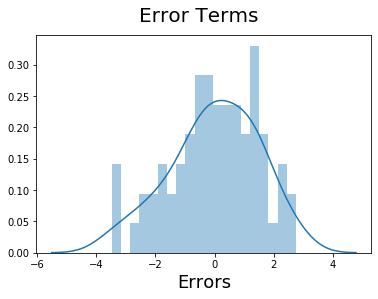

In [871]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_pred), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label

#### Making Points Predictions : 

In [872]:
num_vars=['Loss','Matches_Played','SEASON','Tied','Wins']
test[num_vars]=scaler.transform(test[num_vars])
test.head()

,Loss,Matches_Played,SEASON,Tied,Wins,Bengaluru Bulls,Dabang Delhi,Gujarat Fortunegiants,Haryana Steelers,Jaipur Pink Panthers,Patna Pirates,Puneri Paltan,Tamil Thalaivas,Telugu Titans,U Mumba,U.P. Yoddha
68,-0,-2,1,0,0,0,0,0,0,0,0,0,0,0,0,0
69,0,-1,1,0,-0,0,0,0,0,0,1,0,0,0,0,0
70,-0,-1,1,0,0,0,0,0,0,0,0,0,0,0,1,0
71,-0,-1,1,0,0,1,0,0,0,0,0,0,0,0,0,0
72,-0,-2,1,0,0,0,1,0,0,0,0,0,0,0,0,0


In [873]:

# Creating X_test_new dataframe by dropping variables from X_test
X_test_new = test[X_vif_check.columns]

# Adding a constant variable 
X_test_new = sm.add_constant(X_test_new)
y_test_pred = lm3.predict(X_test_new)

In [874]:
POINTS_SCORED=y_test_pred

In [875]:
POINTS_SCORED.dtypes

dtype('float64')

In [876]:
pd.options.display.float_format = '{:,.0f}'.format
POINTS_SCORED

68    9
69    0
70   10
71   14
72    4
73    9
74    4
75   13
76    8
77   -0
78    3
79    4
dtype: float64

 From points table of above and predicted points we came to a conclusion that , 
 
 --The top 6 teams of the table will be , 

1. Bengal Warriors
2. Dabang Delhi 
3. Bangalore Bulls
4. Haryana Steelers
5. UP Yoddha
6. U Mumba

In [877]:
ranking=pd.DataFrame()
Team_Name=['Bengal Warriors','U Mumba','Bengaluru Bulls','Dabang Delhi','U.P. Yoddha','Haryana Steelers']
Position=[1,6,3,2,5,4]
ranking['Team']=Team_Name
ranking['Position']=Position
ranking.head()

,Team,Position
0,Bengal Warriors,1
1,U Mumba,6
2,Bengaluru Bulls,3
3,Dabang Delhi,2
4,U.P. Yoddha,5


In [878]:
eliminators = [('Bengaluru Bulls', 'U Mumba'),
            ('Haryana Steelers', 'U.P. Yoddha')]

In [879]:
def clean_and_predict(matches, ranking, final, rf):

    # Initialization of auxiliary list for data cleaning
    positions = []

    # Loop to retrieve each team's position according to ICC ranking
    for match in matches:
        positions.append(ranking.loc[ranking['Team'] == match[0],'Position'].iloc[0])
        positions.append(ranking.loc[ranking['Team'] == match[1],'Position'].iloc[0])
    
    # Creating the DataFrame for prediction
    pred_set = []

    # Initializing iterators for while loop
    i = 0
    j = 0

    # 'i' will be the iterator for the 'positions' list, and 'j' for the list of matches (list of tuples)
    while i < len(positions):
        dict1 = {}

        # If position of first team is better then this team will be the 'Team_1' team, and vice-versa
        if positions[i] < positions[i + 1]:
            dict1.update({'Team_1': matches[j][0], 'Team_2': matches[j][1]})
        else:
            dict1.update({'Team_1': matches[j][1], 'Team_2': matches[j][0]})

        # Append updated dictionary to the list, that will later be converted into a DataFrame
        pred_set.append(dict1)
        i += 2
        j += 1
        
        # Convert list into DataFrame
    pred_set = pd.DataFrame(pred_set)
    backup_pred_set = pred_set

    # Get dummy variables and drop winning_team column
    pred_set = pd.get_dummies(pred_set, prefix=['Team_1', 'Team_2'], columns=['Team_1', 'Team_2'])
    # Add missing columns compared to the model's training dataset
    missing_cols2 = set(model_data3.columns) - set(pred_set.columns)
    for c in missing_cols2:
        pred_set[c] = 0
    pred_set = pred_set[model_data3.columns]

    pred_set = pred_set.drop(['Winner'], axis=1)

    # Predict!
    predictions = logreg.predict(pred_set)
    for i in range(len(pred_set)):
        print(backup_pred_set.iloc[i, 1] + " and " + backup_pred_set.iloc[i, 0])
        if predictions[i] == 1:
            print("Winner: " + backup_pred_set.iloc[i, 1])
        else:
            print("Winner: " + backup_pred_set.iloc[i, 0])
        print("")

In [880]:
clean_and_predict(eliminators, ranking, model_data3, rf)

U Mumba and Bengaluru Bulls
Winner: Bengaluru Bulls

U.P. Yoddha and Haryana Steelers
Winner: Haryana Steelers



In [881]:
semifinals = [('Bengal Warriors', 'Bengaluru Bulls'),
            ('Haryana Steelers', 'Dabang Delhi')]

In [882]:
clean_and_predict(semifinals, ranking, model_data3, rf)

Bengaluru Bulls and Bengal Warriors
Winner: Bengal Warriors

Haryana Steelers and Dabang Delhi
Winner: Dabang Delhi



In [883]:
finals=[('Bengal Warriors','Dabang Delhi')]

In [884]:
clean_and_predict(finals, ranking, model_data3, rf)

Dabang Delhi and Bengal Warriors
Winner: Bengal Warriors



# TOURNAMENT PREDICTIONS : 

## TOP OF THE TABLE : 

### 1. Bengal Warriors
### 2. Dabang Delhi 
### 3. Bangalore Bulls

## FINAL PREDICTION : 

### 1. Bengal Warriors(Winner)
### 2. Dabang Delhi (Runner)


### ---------------------------------------------------------------------------------------------------------------------

# TEAM POINTS PREDICTION : 

In [885]:
#read the team data 
team=pd.read_csv("TEAM.csv")
team.head()

,TEAM_NAME,OVERALL_MATCHES_PLAYED,OVERALL_WINS,OVERALL_DRAWS,TOTAL_RAIDS_OVERALL,OVERALL_SUCCESSFUL_RAIDS,OVERALL_UNSUCCESSFUL_RAID,OVERALL_SUCCESSFUL_RAID_P,OVERALL_SUPER_RAIDS,OVERALL_RAID_BONUS,...,S1_SUCCESSFUL_RAID_P,S1_SUPER_RAIDS,S1_RAID_BONUS_POINTS,S1_TOTAL_RAID_POINTS,S1_TOTAL_TACKLES,S1_SUCCESSFUL_TACKLES,S1_SUPER_TACKLES,S1_ALL_OUT_INFL,S1_TOTAL_ALL_OUT_POINTS,S1_TOTAL_DEF_POINTS
0,Bengal Warriors,122,53,15,5183,1725,1127,42%,68,474,...,52%,11,63,283,381,106,16,11,22,122
1,Dabang Delhi K.C.,118,44,8,4991,1698,1135,42%,61,496,...,51%,5,57,285,370,124,10,18,36,134
2,Bengaluru Bulls,122,57,7,5203,1757,1210,43%,61,457,...,45%,7,47,291,353,153,10,20,40,163
3,Haryana Steelers,61,29,7,2633,928,581,44%,36,283,...,NaN,nan,nan,nan,nan,nan,nan,nan,nan,nan
4,Puneri Paltan,123,48,11,5257,1635,1217,39%,62,419,...,49%,11,62,269,368,93,14,12,24,107


In [886]:
players=pd.read_csv("PLAYERS.csv")
players.head()

,PLAYER_NAME,ROLE,EXTRACT_TEAM_NAME,OVERALL_MATCHES,OVERALL_POINTS_EARNED,MOST_POINTS_IN_A_MATCH (OVERALL),OVERALL_NOT_OUT,OVERALL_TOTAL_RAIDS,OVERALL_SUCCESSFUL_RAIDS%,OVERALL_NO_OF_SUPER_RAIDS,...,S3_SUPER_RAIDS,S3_SUPER_10S,S3_TOTAL_RAID_PTS,S3_AVG_RAID_POINTS_MATCH,S3_SUPER_TACKLES,S3_HIGH_5S,S3_TOTAL_TACKLES_PTS,S3_AVG_TACKLES_MATCH,S3_TOTAL_TAC,S3_TACKLE_SR
0,Pawan Kumar Sehrawat,Raider,https://www.prokabaddi.com/teams/bengaluru-bul...,72,572,29,72.57%,835,65,18,...,1,0,45,3,2,0,8,0,17,47.05%
1,Naveen Kumar,Raider,https://www.prokabaddi.com/teams/dabang-delhi-...,38,376,17,83.12%,628,59,5,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,NaN
2,Pardeep Narwal,Raider,https://www.prokabaddi.com/teams/patna-pirates...,101,"1,055",34,77.21%,"1,782",59,46,...,10,5,116,7,0,0,5,0,13,38.46%
3,Maninder Singh,Raider,https://www.prokabaddi.com/teams/bengal-warrio...,76,673,18,79.96%,"1,178",56,20,...,3,5,130,8,1,0,7,0,19,36.84%
4,Vikash Kandola,Raider,https://www.prokabaddi.com/teams/haryana-steel...,48,367,15,78.55%,760,47,11,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,NaN


In [887]:
# fill na with 0 in players dataset
players.fillna(0,inplace=True)

In [888]:
# data cleaning 
# fillna with 0 
team.fillna(0,inplace=True)
team.head()

,TEAM_NAME,OVERALL_MATCHES_PLAYED,OVERALL_WINS,OVERALL_DRAWS,TOTAL_RAIDS_OVERALL,OVERALL_SUCCESSFUL_RAIDS,OVERALL_UNSUCCESSFUL_RAID,OVERALL_SUCCESSFUL_RAID_P,OVERALL_SUPER_RAIDS,OVERALL_RAID_BONUS,...,S1_SUCCESSFUL_RAID_P,S1_SUPER_RAIDS,S1_RAID_BONUS_POINTS,S1_TOTAL_RAID_POINTS,S1_TOTAL_TACKLES,S1_SUCCESSFUL_TACKLES,S1_SUPER_TACKLES,S1_ALL_OUT_INFL,S1_TOTAL_ALL_OUT_POINTS,S1_TOTAL_DEF_POINTS
0,Bengal Warriors,122,53,15,5183,1725,1127,42%,68,474,...,52%,11,63,283,381,106,16,11,22,122
1,Dabang Delhi K.C.,118,44,8,4991,1698,1135,42%,61,496,...,51%,5,57,285,370,124,10,18,36,134
2,Bengaluru Bulls,122,57,7,5203,1757,1210,43%,61,457,...,45%,7,47,291,353,153,10,20,40,163
3,Haryana Steelers,61,29,7,2633,928,581,44%,36,283,...,0,0,0,0,0,0,0,0,0,0
4,Puneri Paltan,123,48,11,5257,1635,1217,39%,62,419,...,49%,11,62,269,368,93,14,12,24,107


In [889]:
team.isnull().sum()

TEAM_NAME                       0
OVERALL_MATCHES_PLAYED          0
OVERALL_WINS                    0
OVERALL_DRAWS                   0
TOTAL_RAIDS_OVERALL             0
OVERALL_SUCCESSFUL_RAIDS        0
OVERALL_UNSUCCESSFUL_RAID       0
OVERALL_SUCCESSFUL_RAID_P       0
OVERALL_SUPER_RAIDS             0
OVERALL_RAID_BONUS              0
OVERALL_TOTAL_RAID_POINTS       0
OVERALL_TOTAL_TACKLES           0
OVERALL_SUCCESSFUL_TACKLES      0
OVERALL_SUPER_TACKLES           0
OVERALL_ALL_OUTS_INFL           0
OVERALL_TOTAL_ALL_OUT_POINTS    0
OVERALL_TOTAL_DEF_POINTS        0
S7_MP                           0
S7_WINS                         0
S7_DRAWS                        0
S7_TOTAL_RAIDS                  0
S7_SUCCESSFUL_RAIDS             0
S7_UNSUCCESSFUL_RAIDS           0
S7_SUCCESSFUL_RAID_P            0
S7_SUPER_RAIDS                  0
S7_RAID_BONUS_POINTS            0
S7_TOTAL_RAID_POINTS            0
S7_TOTAL_TACKLES                0
S7_SUCCESSFUL_TACKLES           0
S7_SUPER_TACKL

- No missing values in our dataset.

In [890]:
players.isnull().sum()

PLAYER_NAME                              0
ROLE                                     0
EXTRACT_TEAM_NAME                        0
OVERALL_MATCHES                          0
OVERALL_POINTS_EARNED                    0
MOST_POINTS_IN_A_MATCH (OVERALL)         0
OVERALL_NOT_OUT                          0
OVERALL_TOTAL_RAIDS                      0
OVERALL_SUCCESSFUL_RAIDS%                0
OVERALL_NO_OF_SUPER_RAIDS                0
OVERALL_SUPER_10S                        0
OVERALL_TOTAL_RAID_POINTS                0
OVERALL_AVERAGE_RAID_POINTS_PER_MATCH    0
OVERALL_NO_OF_SUPER_TACKLES              0
OVERALL_HIGH_5S                          0
OVERALL_TOTAL_TACKLE_POINTS              0
OVERALL_AVG_TACKLE_PER_MATCH             0
OVERALL_TOTAL_TACKLES                    0
OVERALL_TACKLE_SR                        0
S7_MATCHES_PLAYED                        0
S7_TOTAL_POINTS_EARNED                   0
S7_MOST_POINTS_IN_A_MATCH                0
S7_NOT_OUT                               0
S7_TOTAL_RA